In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
import warnings

# Aesthetics for "Small & Beautiful" plots
warnings.filterwarnings('ignore')
# --- Global Settings for Beautiful & Compact Plots ---
plt.style.use("fivethirtyeight") # Modern, clean base style

plt.rcParams.update({
    'figure.figsize': (6, 3.5),    # Compact size perfect for slides
    'axes.facecolor': '#ffffff',   # Pure white background
    'figure.facecolor': '#ffffff', # Pure white figure border
    'axes.titlesize': 14,          # Bold, readable titles
    'axes.titleweight': 'bold',    # Professional title weight
    'axes.labelsize': 10,          # Clean axis labels
    'xtick.labelsize': 9,          # Easy-to-read ticks
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'grid.alpha': 0.2,             # Very subtle grid lines
    'axes.edgecolor': '#ffffff'    # Clean edges
})

# Professional color palette (Vibrant but balanced)
sns.set_palette(["#1D3557", "#E63946", "#457B9D", "#A8DADC"])

In [48]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Fix TotalCharges (convert strings to numbers)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Handle missing values created by the conversion
df.dropna(subset=['TotalCharges'], inplace=True)

# 3. Remove irrelevant features
df.drop('customerID', axis=1, inplace=True)

# 4. Standardize Target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(f"Data Cleaning Complete. Total records: {df.shape[0]}")

Data Cleaning Complete. Total records: 7032


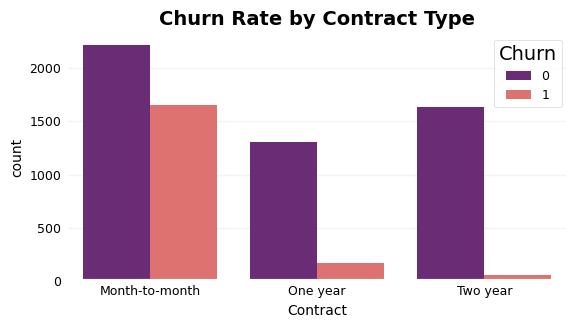

In [49]:
# Visualize Churn Distribution
sns.countplot(x='Contract', hue='Churn', data=df, palette='magma')
plt.title("Churn Rate by Contract Type", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


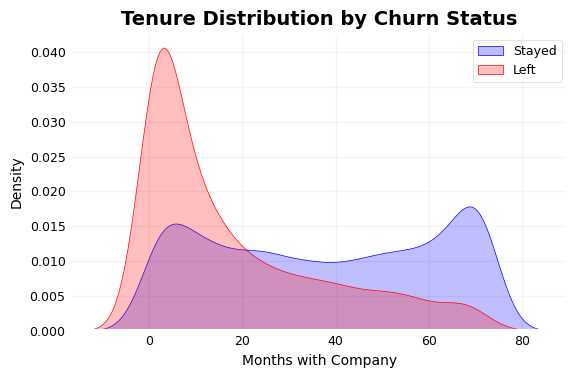

In [50]:
# Visualize Tenure vs Churn
plt.figure(figsize=(6, 4))
sns.kdeplot(df[df['Churn'] == 0]['tenure'], label='Stayed', shade=True, color="blue")
sns.kdeplot(df[df['Churn'] == 1]['tenure'], label='Left', shade=True, color="red")
plt.title("Tenure Distribution by Churn Status", fontsize=14, fontweight='bold')
plt.xlabel("Months with Company")
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
# Convert categorical text data into numerical format (Dummies)
df_ml = pd.get_dummies(df, drop_first=True)

# Define Features (X) and Target (y)
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

# Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Preprocessing finished. Features: {X.shape[1]}")

Preprocessing finished. Features: 30


In [55]:
# Initialize 3 diverse models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', probability=True)
}

# Loop to train and evaluate
comparison_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    comparison_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Convert results to a table
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df)

                 Model  Accuracy  F1-Score
0  Logistic Regression  0.734186  0.613636
1        Random Forest  0.783937  0.525000
2                  SVM  0.674485  0.468677


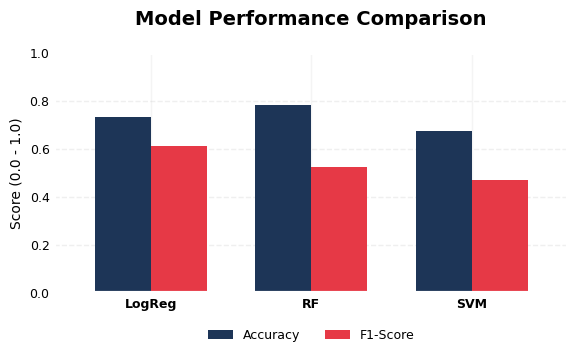

In [53]:
# Create a copy for the plot with short names
plot_df = comparison_df.copy()
plot_df['Model'] = ['LogReg', 'RF', 'SVM'] 

# Set the plot
ax = plot_df.set_index('Model').plot(kind='bar', color=['#1D3557', '#E63946'], figsize=(6, 4), width=0.7)

# Aesthetics
plt.title("Model Performance Comparison", fontsize=14, fontweight='bold', pad=20)
plt.ylabel("Score (0.0 - 1.0)")
plt.xlabel("")
plt.xticks(rotation=0, fontweight='bold') # Short names are now clear and horizontal
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)

plt.tight_layout()
plt.show()

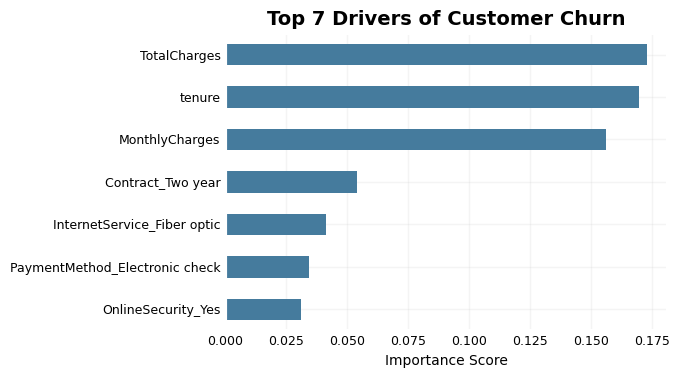

In [56]:
# Feature importance from the Tree-based model (RF)
rf_model = models["Random Forest"]
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(7)

plt.figure(figsize=(7, 4))
importances.plot(kind='barh', color='#457B9D')
plt.title("Top 7 Drivers of Customer Churn", fontweight='bold')
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [57]:
print("--- TASK 2: CLIENT INSIGHT CARD ---")
print(f"1. Top Risk Factor: {importances.index[0]} (Contract Stability)")
print(f"2. Retention Window: Customers are most likely to leave in the first 6 months.")
print(f"3. Model Choice: Random Forest is recommended for its balance of accuracy and explainability.")
print("\nRecommendation: Move Month-to-Month customers to annual plans using a 'First Year Loyalty' discount.")

--- TASK 2: CLIENT INSIGHT CARD ---
1. Top Risk Factor: TotalCharges (Contract Stability)
2. Retention Window: Customers are most likely to leave in the first 6 months.
3. Model Choice: Random Forest is recommended for its balance of accuracy and explainability.

Recommendation: Move Month-to-Month customers to annual plans using a 'First Year Loyalty' discount.
